# Import Data

In [2]:
import pandas as pd
import cvxpy as cp
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#import gdown

ModuleNotFoundError: No module named 'cvxpy'

Создаем DataFrame data, передаем в него имеющиеся данные, дополняем данными sales и cum_sum.
Выводим полученный data

In [ ]:
data = pd.DataFrame({'year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
                     'generate': [8.26192344363636, 9.20460066059596, 12.0178164697778, 15.921260267805, 21.2161740066094, 31.420434564131, 38.3904519471421, 52.3307819867071, 62.9113953016839, 85.1161924282732, 104.083879757882, 132.859216030029, 170.682620580279, 220.600045153997, 276.020526299077, 346.465021938078, 440.385091980306, 530.55442135112, 635.49205101167, 705.805860788812, 831.42968828187, 962.227395409379, 1140.31094904253, 1269.52053571083, 1418.17004626655, 1591.2135122193]})
data['sales'] = [0]+[data['generate'][i+1]-data['generate'][i] for i in range(data.shape[0]-1)]
data['cum_sum'] = data['generate'].cumsum()
data

,year,generate,sales,cum_sum
0,1995,8.261923,0.000000,8.261923
1,1996,9.204601,0.942677,17.466524
2,1997,12.017816,2.813216,29.484341
3,1998,15.921260,3.903444,45.405601
4,1999,21.216174,5.294914,66.621775
5,2000,31.420435,10.204261,98.042209
6,2001,38.390452,6.970017,136.432661
7,2002,52.330782,13.940330,188.763443
8,2003,62.911395,10.580613,251.674839
9,2004,85.116192,22.204797,336.791031


Создаем переменные P, Q, M, и назначаем им скорректированные данные из excel

In [ ]:
# P = cp.Variable()
# Q = cp.Variable()
# M = cp.Variable()
P = 0.000572585
Q = 0.249521952
M = 2407.094319

Создаем функцию bass

In [ ]:
def bass(x):
    # return (P+(Q/M)*(x))*(M-x)
    return P*M+(Q-P)*(x)-(Q/M)*(x**2)

создаем функцию progcum, которая возвращает список спрогнозированных значений на основе формулы Басса, 
в которой первое значение берем от реально сгенерированных данных, остальные на основе предыдущего предсказания

In [ ]:
def progcum(gen):
    a = [gen[0]]
    for i in range(1, len(gen)):
        a.append((bass(a[i-1]))+a[i-1])
    return a

передаем эти данные в DataFrame и выводим его

In [ ]:
data['ProgCumul'] = progcum(data['generate'])
data

,year,generate,sales,cum_sum,ProgCumul
0,1995,8.261923,0.000000,8.261923,8.261923
1,1996,9.204601,0.942677,17.466524,11.689914
2,1997,12.017816,2.813216,29.484341,15.964211
3,1998,15.921260,3.903444,45.405601,21.290339
4,1999,21.216174,5.294914,66.621775,27.921835
5,2000,31.420435,10.204261,98.042209,36.170406
6,2001,38.390452,6.970017,136.432661,46.417653
7,2002,52.330782,13.940330,188.763443,59.128216
8,2003,62.911395,10.580613,251.674839,74.864000
9,2004,85.116192,22.204797,336.791031,94.298631


Полученные данные соответсвуюх excel файлу, создадим функцию вывода данных в график и выведем полученные графики

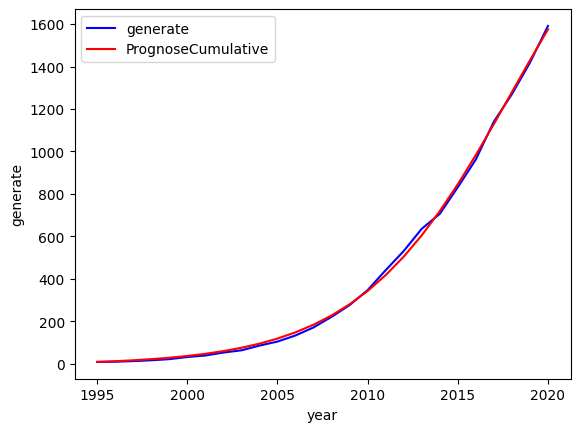

In [ ]:
def grafik(a = data.ProgCumul):
    plt.plot(data.year, data.generate, 'b-', label='generate')
    plt.plot(data.year, a, 'r-', label='PrognoseCumulative')
    plt.xlabel('year')
    plt.ylabel('generate')
    plt.legend()
    plt.show()
grafik()

сгенерируем параметры P,Q,M через модуль scypy и выведем полученные данные в график,
прелыдущие P,Q,M сохраним в переменную, что бы сравнивать

In [ ]:
def bass2(x, p, q, m):
    # return (p+(q/m)*(x))*(m-x)
    return (p*m+(q-p)*(x))-(q/m)*(x**2)
# popt, pcov = curve_fit(bass2, data.cum_sum[0:26], data.generate[0:26], maxfev = 5000)
popt, pcov = curve_fit(bass2, data.cum_sum[1:23], data.generate[1:23], maxfev = 5000)

PQM = [P, Q, M]
print(f'P - {round(popt[0],5)}, Q - {round(popt[1],5)}, M - {round(popt[2],5)}')
print(f'P - {P}, Q - {Q}, M - {M}')

NameError: name 'curve_fit' is not defined

из полученных данных видно, что не соответствует только параметр M,
перепишем DataFrame на основе новых данных и выведем в график

/tmp/ipykernel_3629/3992425835.py:3: RuntimeWarning: overflow encountered in scalar power
  return P*M+(Q-P)*(x)-(Q/M)*(x**2)


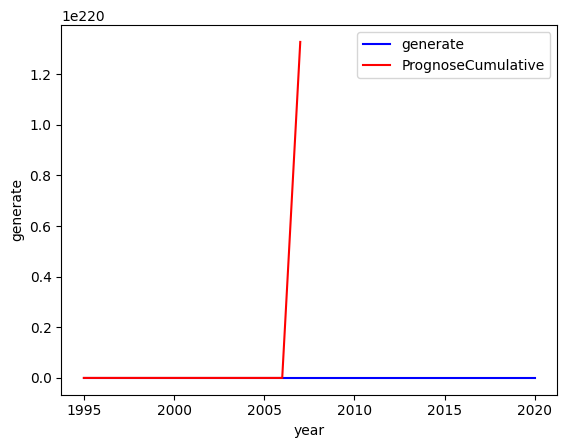

In [ ]:
P = popt[0]
Q = popt[1]
M = popt[2]
data['ProgCumul1'] = progcum(data['generate'])
grafik(data.ProgCumul1)

проверим, что получится если сгенерировать P, Q, M на основе спрогнозированных данных

In [ ]:
data['cum_sum2'] = data['ProgCumul1'].cumsum()
popt, pcov = curve_fit(bass2, data.cum_sum2[0:25], data.ProgCumul1[1:26], maxfev = 5000)

print(f'P - {round(popt[0],5)}, Q - {round(popt[1],5)}, M - {round(popt[2],5)}')
print(f'P - {PQM[0]}, Q - {PQM[1]}, M - {PQM[2]}')
# P = popt[0]
# Q = popt[1]
# M = popt[2]
# data['ProgCumul2'] = progcum(data['generate'])
# grafik(data.ProgCumul1)

ValueError: array must not contain infs or NaNs

In [ ]:
# objective = cp.Minimize(cp.sum_squares(progcum(data['generate']) - data['generate']))
# constraints = [P >= 0, Q >= 0, M >= 0]
# prob = cp.Problem(objective, constraints)
# result = prob.solve()
# print(P.value)
# print(Q.value)
# print(M.value)

In [ ]:

# data['progsal'] = [0] + list(map(bass, data.generate[1:]))
# data = data.assign(ProgCumul = data.generate[0]).assign(ProgCumul = lambda x: bass(x.ProgCumul.shift(1, fill_value=x.generate[0])) + x.ProgCumul.shift(1, fill_value=0))
# data = data.assign(ProgCumul = lambda x: x.generate if x.generate.shift(1, fill_value=0) == 0 else bass(x.generate.shift(1, fill_value=x.generate[0])) + x.generate.shift(1, fill_value=0))
# data = data.assign(ProgCumul = data.generate[0]).assign(ProgCumul = lambda x: bass(x.ProgCumul.shift(1, fill_value=x.generate[0])) + x.ProgCumul.shift(1, fill_value=0))

# data['ProgCumul'] = progcum(data['generate'])
# data


In [ ]:
def squaremist(a, b):
    c = []
    for i in range(len(a)):
        c.append((b[i]-a[i])**2)
    return(c)
# squaremist(data['generate'], data['ProgCumul'])

In [ ]:
# objective = cp.Minimize(cp.sum(squaremist(data['generate'], progcum(data['generate']))))
# constraints = [P >= 0, Q >= 0, M >= 0]
# prob = cp.Problem(objective)
# result = prob.solve()
# print(P.value)
# print(Q.value)
# print(M.value)
# print(objective)